# Esercizio 3 (ottimizzato)

#### Autore: P. Scordino
#### Data: 01 maggio 2020

In [158]:
# Importazione moduli

import pandas as pd            # modulo per la manipolazione dei datafraame
import numpy as np             # modulo per calcoli algebrici
from itertools import compress # funzione che permette di filtrare rispetto ad un vettore logico

In [159]:
# Caricamento dataset (file csv) e subsetting dello stesso

df = pd.read_csv('cli-prod.csv')
df1 = df.iloc()[:, 1:len(df.columns) + 1]

In [160]:
# Estrazione delle etichette delle colonne in esame

lista_prodotti = list(df.columns)
lista_prodotti.pop(0)

'ID_Cliente'

In [161]:
# Trasformazione del dataframe in un array

df_array = df1.to_numpy()

In [162]:
# Calcolo della distanza euclidea con due metodi semplici

#lista_dist2 = []

#for i in range(len(df_array) - 1):
#    lista_dist2.append(np.linalg.norm(df_array[9] - df_array[i]))
    
lista_dist = []

for i in range(len(df_array) - 1):
    lista_dist.append(np.sqrt(np.sum((df_array[len(df_array) - 1] - df_array[i]) ** 2, axis=0)))

In [163]:
# Conteggio del numero di distanza minime ed estrazione dei relativi indici

counting = []
index = []
for i, j in enumerate(lista_dist):
    count = 0
    if j == min(lista_dist):
        count += 1
        counting.append(count)
        index.append(i)

In [164]:
# Estrazione dei nomi  dei Clienti e del Cliente in esame

Clienti = df.iloc[0:len(df), :1].to_numpy()
Cliente = df.iloc[(len(df) - 1):len(df), :1].to_numpy()[0, 0]

In [165]:
# Cliente in esame (posizionato alla fine del dataset)

df.iloc[(len(df)-1):len(df), ]

,ID_Cliente,sesso_M,sesso_F,patata,carota,sedano,broccolo,verza
9,Z,2,0,1,0,0,1,0


In [166]:
# Cliente o Clienti con distanza minima rispetto al cliente in esame

df.iloc[index, ]

,ID_Cliente,sesso_M,sesso_F,patata,carota,sedano,broccolo,verza
1,B,2,0,1,0,1,1,0


In [167]:
# Ricerca dei prodotti mancanti rispetto al Cliente in esame e ai Clienti con minore distanza euclidea

lista_logica = []
for i, j in enumerate(index):
     lista_logica.append(list(df_array[len(df_array)-1] != df_array[j]))

In [168]:
# Risultato

risultato = list(compress(lista_prodotti, lista_logica[0]))
if len(risultato) > 1:
    print(f'A', Cliente, 'vengono proposti i seguenti prodotti:', risultato)
else:
    print(f'A', Cliente, 'viene proposto il seguente prodotto:', risultato)

A Z viene proposto il seguente prodotto: ['sedano']


### Creazione di un dendrogramma

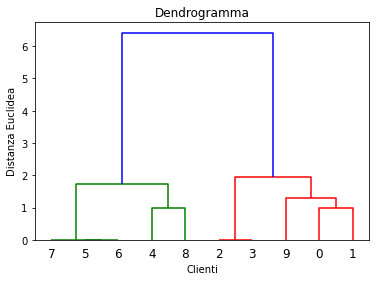

In [173]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

dendrogram = sch.dendrogram(sch.linkage(df_array, method  = "ward"))
plt.title('Dendrogramma')
plt.xlabel('Clienti')
plt.ylabel('Distanza Euclidea')
plt.show()